# **Aprendizaje supervisado**
# SL02. Introducción a las Técnicas de Aprendizaje Supervisado

## <font color='blue'>**Conceptos básicos de aprendizaje supervisado**</font>

**Definición**: El Aprendizaje Supervisado es un paradigma del aprendizaje automático en el cual un modelo es entrenado utilizando un conjunto de datos etiquetado, compuesto por pares de entrada y salida esperada. El objetivo del modelo es aprender una función que mapee las entradas a las salidas con la mayor precisión posible. Durante la fase de entrenamiento, el algoritmo ajusta sus parámetros en función de un criterio de optimización, minimizando la diferencia entre sus predicciones y los valores reales proporcionados en los datos de entrenamiento. Una vez entrenado, el modelo es capaz de generalizar a datos no vistos, realizando predicciones basadas en el conocimiento adquirido. Los algoritmos de aprendizaje supervisado pueden dividirse en dos categorías principales: __clasificación__, cuando la variable objetivo es categórica, y __regresión__, cuando la variable objetivo es continua.

**Ejemplo 1**: Una banco recibe nuevos pedidos para acceder a una tarjeta de crédito. Cada pedido tiene información acerca del solicitante:
* Liquidación de sueldo
* Edad
* Estado Civil
* DICOM
* Situación crediticia
* Otras variables

*Problema*: Determinar si aceptar o rechazar la solicitud de tarjeta de crédito.

**Ejemplo 2**: El servicio de correo de la empresa recibe cientos de mails por día.

*Problema*: Clasificar cada mail como correo basura (spam) o correo deseado, para filtrar y aligerar el servicio.



En las **técnicas de aprendizaje supervisado** se dispone de un conjunto de registros (o ejemplos, o instancias) descritos por $n$ atributos: $A_{1}, A_{2}, ... , A_{n}$ y cada instancia está anotada con una etiqueta, pudiendo ser una clase (Spam / No Spam), o un valor numérico (score crediticio).

### Problemas de regresión

Dados $(x_{1}, y_{1}), (x_{2}, y_{2}), …, (x_{n}, y_{n})$

Aprender una $f(x)$ que permita predecir $y$ a partir de $x$

Si $y$ ϵ $ℝ^{n}$: **Es un problema de regresión**.

<img src='https://drive.google.com/uc?export=view&id=1uFNcRUiTdsxvA5gDcfzdmaCdwdSq0rip' width="600" align="center" style="margin-right: 20px">



### Problemas de clasificación

Dados $(x_{1}, y_{1}), (x_{2}, y_{2}), …, (x_{n}, y_{n})$

Aprender una $f(x)$ que permita predecir $y$ a partir de $x$

Si $y$ es categórica: **Es un problema de clasificación**.

<img src='https://drive.google.com/uc?export=view&id=1yobeKYHC5QmSpbMP4HoqfVL-YiAUBObH' width="600" align="center" style="margin-right: 20px">

La variable $x$ puede ser multidimensional.

Cada dimensión corresponde a un atributo:
* Edad del paciente
* Tamaño del tumor
* Uniformidad en la forma de la célula
* Etcétera

**La regresión busca “acercar” los datos a una función (lineal, polinomial, etc.)**.

**La clasificación busca separar los datos mediante ciertos “bordes”**.

### Elección de hiperparámetros

Dividir el conjunto total de ejemplos en tres subconjuntos:

* **Entrenamiento**: aprendizaje de variables del modelo.
* **Validación**: ajuste/elección de hiperparámetros.
* **Prueba**: estimación final del desempeño del modelo entrenado (y con hiperparámetros elegidos adecuadamente).
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1tfFwQhMBTQqJeGsGKXW67mK7EcOE6y7g' width="500" align="center" style="margin-right: 20px">
<br><br>

## <font color='blue'>**Modelos de Regresión Lineal y Polinomial**</font>

La **regresión lineal** y la **regresión polinómica** son técnicas estadísticas utilizadas para modelar la relación entre una variable dependiente y una o más variables independientes. La **regresión lineal** asume una relación lineal, representada por una ecuación de la forma $ y = mx + b $, donde $ m $ es la pendiente y $ b $ la intersección. En contraste, la **regresión polinómica** permite modelar relaciones más complejas al incluir términos elevados a potencias mayores, como $ y = a x^2 + b x + c $, lo que permite capturar curvaturas en los datos. Mientras que la regresión lineal es adecuada para datos con una tendencia lineal clara, la regresión polinómica es útil cuando la relación entre las variables es no lineal.

### Regresión Lineal

Busca ajustar los datos de entrenamiento mediante una **función que sea un hiperplano**.

$$y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{d}x_{d}=
\sum_{j=0}^{d}\theta_{j}x_{j}$$

Los valores 𝜃 son los pesos de los atributos (o features en inglés). Se entrena minimizando la suma del error cuadrático.

### Regresión Polinomial

Busca ajustar los datos de entrenamiento mediante una **función polinomial**.

$$y(x,w) = w_{0}+w_{1}x+w_{2}x^{2}+...+w_{M}x^{M}=
\sum_{j=0}^{M}w_{j}x^{j}$$

Mientras **más alto el grado del polinomio**, más se ajusta a los datos, pero se vuelve más complejo y **tiende a sobreajustar**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Aplicación de Regresión Lineal


Ejemplo en este [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

En el siguiente ejemplo utilizaremos la primera característica del conjunto de datos de diabetes, de manera de implementar un modelo de regresión lineal.

<img src='https://drive.google.com/uc?export=view&id=1if8WHBplmfFEnqU1FW8zEvCdQax1EcPu' width="500" align="center" style="margin-right: 20px">

In [ ]:
# Cargar el dataset de diabetes
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

__Características (features) del dataset de diabetes en sklearn:__

Las características han sido normalizadas a valores numéricos con media 0 y varianza 1. Estas representan mediciones clínicas de pacientes, y corresponden a:
1. Edad (age)
2. Sexo (sex)
3. Índice de Masa Corporal (IMC) (body mass index - BMI)
4. Presión arterial promedio (average blood pressure)
5. Medida sérica 1 (tc - total serum cholesterol)
6. Medida sérica 2 (ldl - low-density lipoprotein cholesterol)
7. Medida sérica 3 (hdl - high-density lipoprotein cholesterol)
8. Medida sérica 4 (tch - total cholesterol/HDL ratio)
9. Medida sérica 5 (ltg - lamotrigine level, asociado con niveles de triglicéridos)
10. Medida sérica 6 (glu - blood sugar level)

Variable objetivo (target)

La variable objetivo representa la progresión de la diabetes medida un año después, en una escala continua.

In [ ]:
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Deconstrucción de diabetes_X
# Tomaremos una única caractarística para poder visualizar nuestro modelo
# En la vida real podemos usar varias de ellas o las mejores en la medida que aporten
# a la capacida predictora de nuestro modelo.
diabetes.data.shape

(442, 10)

In [ ]:
# Utilizamos la feature número 2 (bmi)
diabetes.data[:,2].shape

(442,)

In [ ]:
# Para poder operar adecuadamente, debemos convertir el vector (442,) en
# una matriz (442,1); en caso contrario nos dará un error.
diabetes.data[:, np.newaxis, 2].shape

(442, 1)

In [ ]:
# Utilizar una característica
diabetes_X = diabetes.data[:, np.newaxis, 2] # Probar con la característica 5 (presión arterial), nos dara un R2 negativo (el modelo no explica la varianza de los datos).

In [ ]:
diabetes_X[:3]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121]])

In [ ]:
# Dividir los datos en conjuntos de training/testing
# Esta división es para efectos ilustrativos. En cualquier otro caso deberíamos
# hacer una selección aleatoria de registros para train y test
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Dividir las salidas en conjuntos de training/testing
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [ ]:
# Crear la Regresión Lineal
regr = linear_model.LinearRegression()

In [ ]:
# Entrenar el modelo usando los datos de entrenamiento (training)
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Predecir usando el conjunto de test
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
regr.coef_*diabetes_y_test+regr.intercept_

array([218762.34053339,  85532.5642357 , 104297.32146073, 142765.07377203,
       112741.46221199,  63014.85556567, 291006.65584975,  88347.27781945,
       171850.44747082,  62076.61770442, 162468.06885831,  67706.04487192,
        46126.57406314,  60200.14198191,  45188.33620189, 167159.25816457,
        97729.65643197, 124000.316547  , 206565.24833712,  53632.47695315])

In [ ]:
regr.intercept_

152.91886182616113

Coeficiente (pendiente) w =  938.238
Intercepto b =  152.919
Error Cuadrático Medio (MSE): 2548.07
Coeficiente de determinación (R²): 0.47


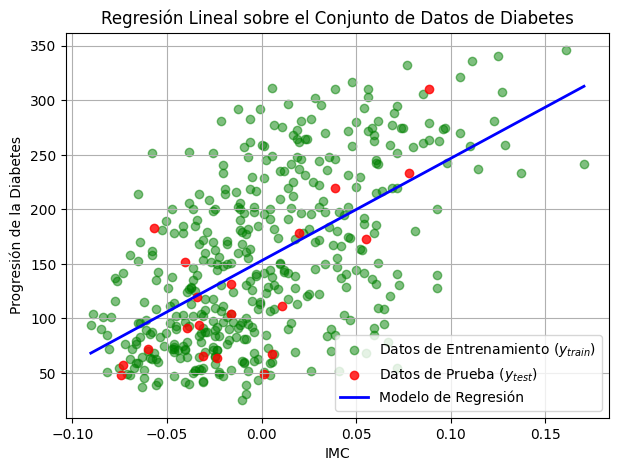

In [ ]:
# Coeficientes de la regresión lineal
print(f'Coeficiente (pendiente) w = {regr.coef_[0]: 5.3f}')
print(f'Intercepto b = {regr.intercept_: 5.3f}')

# Error Cuadrático Medio (MSE)
mse = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# Coeficiente de determinación (R^2)
r2 = r2_score(diabetes_y_test, diabetes_y_pred)
print(r'Coeficiente de determinación (R²): %.2f' % r2)

# Gráfico de dispersión y regresión lineal
plt.figure(figsize=(7, 5))
plt.scatter(diabetes_X_train, diabetes_y_train, color='green', alpha=0.5, label='Datos de Entrenamiento ($y_{train}$)')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', alpha=0.8, label='Datos de Prueba ($y_{test}$)')

# Creación de la línea de regresión
x = np.linspace(min(diabetes_X_train), max(diabetes_X_train), 100)
y_pred_line = regr.coef_ * x + regr.intercept_
plt.plot(x, y_pred_line, c='b', linewidth=2, label='Modelo de Regresión')

# Etiquetas y leyenda
plt.xlabel('IMC')
plt.ylabel('Progresión de la Diabetes')
plt.title('Regresión Lineal sobre el Conjunto de Datos de Diabetes')
plt.legend()
plt.grid(True)

plt.show()

## <font color='green'>Actividad 1</font>

Utilizaremos el dataset Longley, el cual es ideal para realizar regresiones. El conjunto de datos de Longley contiene varias variables macroeconómicas de USA. Que se sabe que son altamente colineales.

1. Implementar un modelo de regresión lineal entre el producto interno bruto (GNP) y el número total de gente empleada (Employed).
2. Calcule las métricas del modelo: $\text{MSE}$, $\text{RMSE}$ y $R^2$.
2. Graficar los datos utilizados y el resultado de la regresión lineal.

In [ ]:
# importando la api de statsmodels
import pandas.testing as tm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Primeras filas del dataset:
          GNP.deflator      GNP  Unemployed  Armed.Forces  Population  Year  \
rownames                                                                      
1947              83.0  234.289       235.6         159.0     107.608  1947   
1948              88.5  259.426       232.5         145.6     108.632  1948   
1949              88.2  258.054       368.2         161.6     109.773  1949   
1950              89.5  284.599       335.1         165.0     110.929  1950   
1951              96.2  328.975       209.9         309.9     112.075  1951   

          Employed  
rownames            
1947        60.323  
1948        61.122  
1949        60.171  
1950        61.187  
1951        63.221  

Resumen del modelo:
                            OLS Regression Results                            
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:      

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


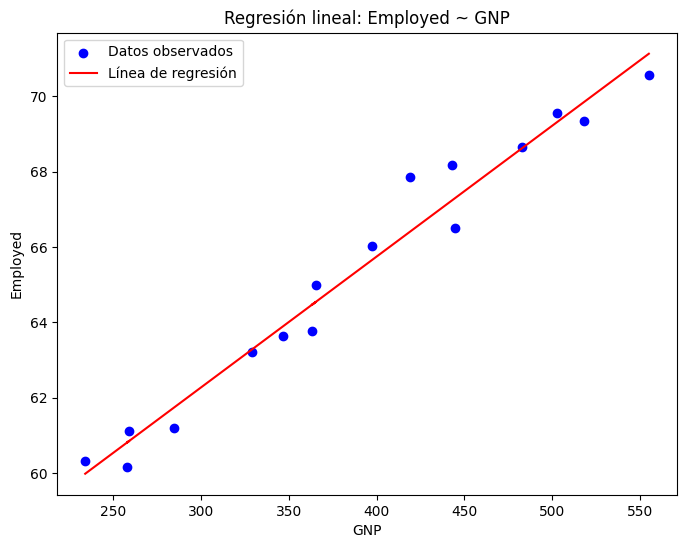

In [ ]:
# Tu código aquí ...



import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Cargando el dataset Longley
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
print("Primeras filas del dataset:")
print(df.head())

# Ajustando el modelo de regresión lineal: Employed ~ GNP
modelo = smf.ols(formula="Employed ~ GNP", data=df).fit()
print("\nResumen del modelo:")
print(modelo.summary())

# Predicciones utilizando el modelo ajustado
df['predicho'] = modelo.predict(df['GNP'])

# Cálculo de las métricas
mse = mean_squared_error(df['Employed'], df['predicho'])
rmse = np.sqrt(mse)
r2 = modelo.rsquared

print("\nMétricas del modelo:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Graficando los datos y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(df['GNP'], df['Employed'], label="Datos observados", color="blue")
plt.plot(df['GNP'], df['predicho'], color="red", label="Línea de regresión")
plt.xlabel("GNP")
plt.ylabel("Employed")
plt.title("Regresión lineal: Employed ~ GNP")
plt.legend()
plt.show()



<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Modelo de Regresión Logística**</font>

La **regresión logística** es un modelo estadístico utilizado para resolver problemas de **clasificación binaria**, donde la variable de salida toma solo dos valores, típicamente 0 y 1. A diferencia de la **regresión lineal**, que puede generar valores fuera del rango $[0,1]$, la regresión logística aplica una transformación **sigmoide** para modelar probabilidades y garantizar que las predicciones estén dentro de este intervalo.

Si una variable cualitativa con dos niveles se codifica como 1 y 0, matemáticamente es posible ajustar un modelo de **regresión lineal** por mínimos cuadrados:

$$ y = \theta_0 + \theta_1 x $$

Sin embargo, esta aproximación presenta un problema: al tratarse de una recta, para valores extremos del predictor $x$, se obtienen valores de $y$ menores que 0 o mayores que 1, lo que entra en contradicción con el hecho de que las probabilidades siempre deben estar dentro del rango $[0,1]$. Esto se puede observar en la siguiente imagen:

<br><br>
<img src='https://drive.google.com/uc?export=view&id=1Q4bIjcZYsyc5RxlpcHpaZlXL21_yu4Ca' width="400" align="center" style="margin-right: 20px">
<br><br>

Para evitar este problema, la **regresión logística** utiliza una función que restringe los valores predichos al intervalo $(0,1)$: la función **sigmoide**, definida como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Donde:
- $\sigma(z)$ es la probabilidad estimada de que la observación pertenezca a la clase 1.
- $z = \theta_0 + \theta_1 x$ es la combinación lineal de los predictores.

En términos probabilísticos, el modelo de regresión logística se expresa como:

$$ P(Y=1 | X) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}} $$

Donde:
- $\theta_0$ y $\theta_1$ son los parámetros del modelo.
- $e$ es la base del logaritmo natural.
- La función sigmoide $\sigma(z) = \frac{1}{1+e^{-z}}$ limita la salida al rango $(0,1)$.

Esta transformación garantiza que la salida del modelo siempre se mantenga entre 0 y 1, permitiendo interpretar la predicción como una **probabilidad**. En la práctica, se establece un **umbral de decisión** (generalmente 0.5): si $P(Y=1 | X) \geq 0.5$, la observación se clasifica en la categoría 1, de lo contrario, en la categoría 0.

### **Aplicaciones de la Regresión Logística**
La **regresión logística** es ampliamente utilizada en problemas de clasificación, tales como:
- **Detección de fraudes** en transacciones financieras.
- **Diagnóstico médico**, como la predicción de enfermedades.
- **Reconocimiento de patrones**, como clasificación de correos electrónicos en spam o no spam.

Esta metodología es una de las más usadas en el aprendizaje automático para **modelar probabilidades y tomar decisiones en problemas de clasificación binaria**.

### __La función *sigmoide*__
<br><br>
$$
\text{Función Sigmoide} = \sigma(x) =  \frac{1}{1 + e^{-x}}
$$
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1MeNaOMGnQE1uBOLfJAR4b53d0v630mHR' width="400" align="center" style="margin-right: 20px">
<br>

__Modelo de regresión logística__

A nuestra función de regresión lineal:

$$h_{\theta}(x)=g(\theta^{T}x)$$

Le aplicamos la función __logit__

$$g(z) = \frac{1}{1+e^{-z}}$$

Y obtenemos nuestro modelo de regresión logística:


$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

Gráficamente:
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1O6wSAaisgRM-GlBfjW2tGv7k8QEMJ4WI' width="400" align="center" style="margin-right: 20px">
<br><br>

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$



<img src='https://drive.google.com/uc?export=view&id=1esyo1Y8jCivlo7Xwyeyd0CWiVnWO6Ftk' width="400" align="center" style="margin-right: 20px">

### Aplicación de Regresión Logística


Ejemplo basado en el dataser de la Flor de Iris, en este [link](https://scikit-learn.org/1.4/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)


Definiremos los límites de decisión de un clasificador de regresión logística para las dos primeras dimensiones (longitud y ancho del sépalo) del conjunto de datos de la flor de iris. Los puntos de datos están coloreados de acuerdo con sus etiquetas.

<img src='https://drive.google.com/uc?export=view&id=1ZYk0BQjKqxm9jy72TnjjsjU1XB8eNE4W' width="400" align="center" style="margin-right: 20px">

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
# importar la data de la flor iris
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


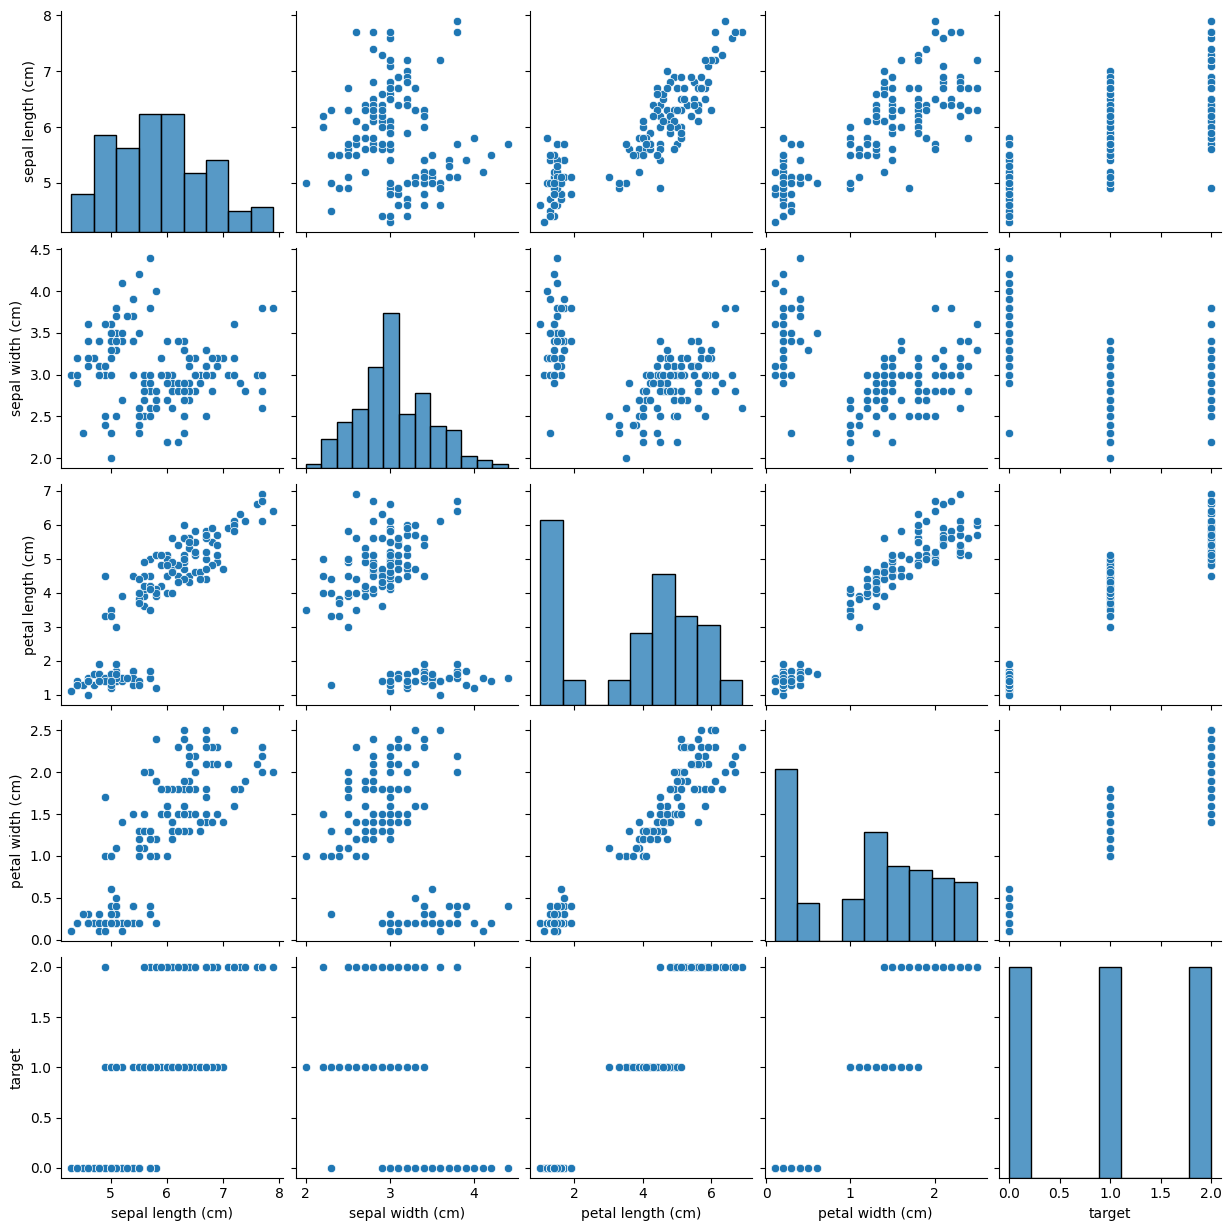

In [ ]:
import seaborn as sns
sns.pairplot(data=data1)
plt.show()

In [ ]:
X = iris.data[:, :2]  # seleccionar las 2 primeras características.
y = iris.target
X = X[y<2]            # usaremos solo 2 clases
y = y[y<2]            # usaremos solo 2 clases

In [ ]:
def plot_decision_boundary(X, y, regression):
    # Gráfico de los límites de decisión. Para eso, asignaremos un color a cada
    # punto en la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamaño de paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    # Plotear los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

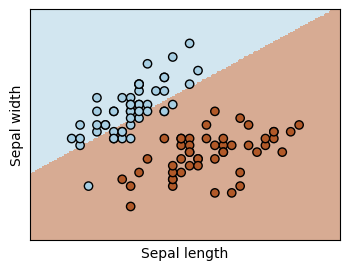

In [ ]:
# crear una instancia de clasificador de regresión logística
logreg = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=2).fit(X, y)
plot_decision_boundary(X, y, logreg)

# lbfgs: Limited-memory Broyden–Fletcher–Goldfarb–Shanno, es un algoritmo de optimización
# utilizado para minimizar funciones no lineales y diferenciables.

## <font color='green'>Actividad 2</font>

1. Utilizando el modelo de regresión logística anterior, varíe los parámetros del modelo y vea los efectos sobre los límites de clasificación.
2. Aplique el modelo sobre las mismas 2 características usadas anteriomente, pero utilice las 3 clases que existen para la flor de iris.

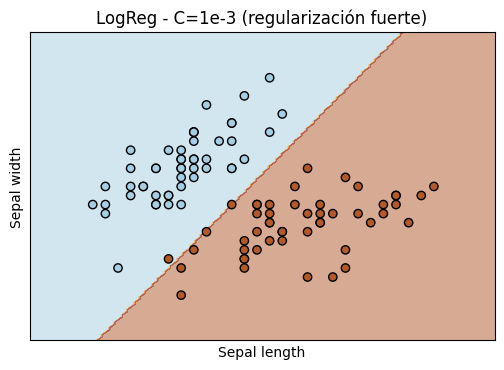

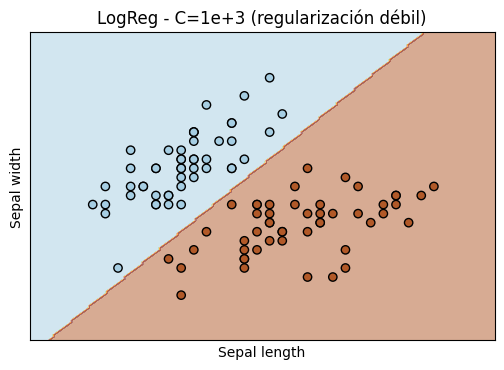

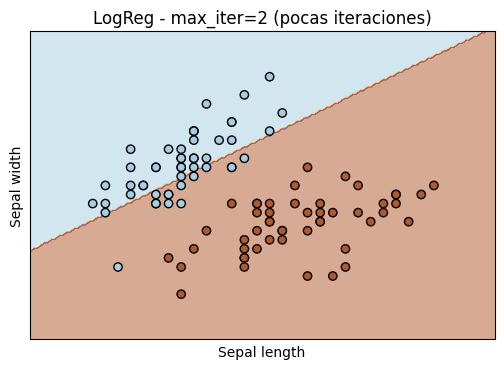

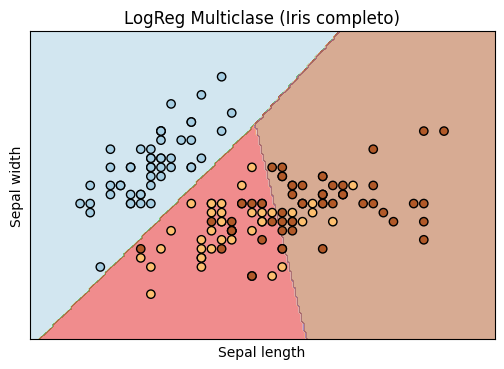

In [ ]:
# Tu código aquí ...

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Cargar el dataset Iris y seleccionar las dos primeras características.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos las dos primeras características.
y = iris.target

# ---------------------------
# Actividad 1: Clasificación binaria
# Filtramos para usar solo dos clases.
X_binary = X[y < 2]
y_binary = y[y < 2]

def plot_decision_boundary(X, y, clf, title=''):
    # Definir el rango de la malla.
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # tamaño del paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir la clase para cada punto de la malla.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear el gráfico.
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

# --- Variar parámetros en el modelo de regresión logística ---
# Variante 1: Regularización fuerte (C pequeño)
clf1 = LogisticRegression(C=1e-3, solver='lbfgs', max_iter=100)
clf1.fit(X_binary, y_binary)
plot_decision_boundary(X_binary, y_binary, clf1, title='LogReg - C=1e-3 (regularización fuerte)')

# Variante 2: Regularización débil (C grande)
clf2 = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=100)
clf2.fit(X_binary, y_binary)
plot_decision_boundary(X_binary, y_binary, clf2, title='LogReg - C=1e+3 (regularización débil)')

# Variante 3: Muy pocas iteraciones (posible falta de convergencia)
clf3 = LogisticRegression(C=1e+3, solver='lbfgs', max_iter=2)
clf3.fit(X_binary, y_binary)
plot_decision_boundary(X_binary, y_binary, clf3, title='LogReg - max_iter=2 (pocas iteraciones)')

# ---------------------------
# Actividad 2: Clasificación multiclase
# Utilizamos las mismas dos características, pero ahora con las 3 clases.
X_multi = X  # ya contiene las 2 características seleccionadas
y_multi = y

# En problemas multiclase podemos usar 'multinomial' (con solver 'lbfgs') para optimización conjunta.
clf_multi = LogisticRegression(C=1e+3, solver='lbfgs', multi_class='multinomial', max_iter=200)
clf_multi.fit(X_multi, y_multi)
plot_decision_boundary(X_multi, y_multi, clf_multi, title='LogReg Multiclase (Iris completo)')


<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Naive Bayes**</font>

Es un clasificador basado en el teorema de Bayes, con una asunción “naive” sobre los datos. Es muy sencillo de programar y entender.

Sirve mucho como baseline y, aunque simplista, puede tener resultados que sobrepasan a algoritmos mucho más complejos. Es rápido de entrenar y funciona con datos de mucha dimensionalidad; por ejemplo, es muy útil a la hora de clasificar documentos.

El algoritmo de “Naive Bayes” está fuertemente ligado al teorema de Bayes.  
El Teorema de Bayes establece:
<br><br>
$$P(A\mid B)=\frac{P(B\mid A)P(A)}{P(B)}$$
<br>
El teorema establece que se puede encontrar la probabilidad de **A** (una clase objetivo) dada la ocurrencia de **B** (un conjunto de características). Es decir, **B** es la evidencia y **A** es la hipótesis.

Bajo el teorema de Bayes, el principal supuesto es que **los atributos son independientes entre sí**.  
La presencia de un feature no afecta a los otros. Este supuesto es “naive” (ingenuo), de ahí el nombre del algoritmo. Un segundo supuesto es que todos los atributos tienen el mismo efecto en la salida del algoritmo.

En base a lo establecido, se puede utilizar el teorema de Bayes para calcular la probabilidad de una clase $y$ de la siguiente manera:
<br><br>
$$P(y\mid X)=\frac{P(X\mid y)P(y)}{P(X)}$$
<br>
donde $y$ representa la clase y $X$ representa el vector de características $X=(x_{1}, x_{2},x_{3},...,x_{n})$.

Reemplazando $X$ en la ecuación, nos queda:
<br><br>
$$P(y\mid x_{1}, x_{2},x_{3},...,x_{n})=\frac{P(x_{1}\mid y)P(x_{2}\mid y)...P(x_{n}\mid y)P(y)}{P(x_{1})P(x_{2})...P(x_{n})}$$
<br>
$$P(y\mid x_{1}, x_{2},x_{3},...,x_{n})\; \propto \; P(y)\prod_{i=1}^{n}P(x_{i}\mid y)$$
<br>
### **Tipos de Algoritmos**

- **Bernoulli Naive Bayes (BNB)**: Para casos donde los atributos son variables binarias, por ejemplo, si una palabra ocurre o no en un documento.

- **Multinomial Naive Bayes (MNB)**: Para casos donde los atributos representan frecuencias, por ejemplo, la cantidad de veces que una palabra ocurre en un documento. Se usa en clasificación de **texto** y procesamiento de lenguaje natural (NLP).

- **Gaussian Naive Bayes (GNB)**: Para casos donde los atributos toman valores continuos, se asume que los valores son muestras de una distribución gaussiana. Esto se usa para calcular las probabilidades condicionales en el algoritmo. e usa en aplicaciones como **reconocimiento de imágenes**.

Podemos ver en términos gráficos un ejemplo de clasificación binaria. En la imagen se ve un conjunto de datos con dos variables: _Edad_ y _Salario_ (_Salary_ y _Age_); y dos clases: _Camina_ y _Conduce_ (_Walks_ y _Drives_).

<br><br>
<img src='https://drive.google.com/uc?export=view&id=1tfGaZEb57iiwI9xSdy_94kccQqBozc2h' width="400" align="center" style="margin-right: 20px">
<br>

¿Cómo podríamos clasificar un punto nuevo?
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1HzSle80x9yxnldvzlI3VUF7FtHvPGUDW' width="400" align="center" style="margin-right: 20px">
<br>

Aplicamos el Teorema de Bayes para determinar si esa persona, con su determinada edad y salario, caminará o conducirá.
<br><br>
$$
P(Camina|X) = \frac{P(X|Camina) \;P(Camina)}{P(X)} \\
P(Conduce|X) = \frac{P(X|Conduce) \;P(Conduce)}{P(X)}
$$
<br>
donde $X$ representa el nuevo punto (_Edad_, _Salario_). La probabilidad de que camine, $P(Camina)$, es:
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1kefz8p_QTFDtIyjMKO5rGE6mUrfsq-ic' width="600" align="center" style="margin-right: 20px">
<br>

Lo anterior fue fácil de calcular. Ahora debemos computar la probabilidad de $X$, $P(X)$. Para ello utilizamos la técnica de **Vecinos más cercanos**. En la imagen vemos 4 observaciones de un total de 30.
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1uXWIxJbcRLSICS-QzMHjCi2KX3P7YSvF' width="600" align="center" style="margin-right: 20px">
<br>


Por último, nos falta calcular la $P(X|Camina)$.
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1Qi-RsScYYAcQRLSrPTuAUOPEkJixMgsS' width="600" align="center" style="margin-right: 20px">
<br>

De la imagen se desprende que, de nuestro clúster de **Vecinos más cercanos**, hay solo 3 que caminan de un total de 10 (cruces rojas). Aplicamos entonces la fórmula y obtenemos la $P(Camina|X)$:
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1sPwcXJ9GKSJWl_AF6MjvhxY2GFT9jcau' width="500" align="center" style="margin-right: 20px">
<br><br>


Y de igual manera para la $P(Conduce|X)$.
<br><br>
<img src='https://drive.google.com/uc?export=view&id=106-Ret6ggAK8svPkZedy70jCm9IG92XG' width="500" align="center" style="margin-right: 20px">
<br><br>

Entonces, comparando las probabilidades:

$$
P(Camina|X) = 0.75 \\
P(Conduce|X) = 0.25
$$

El nuevo punto lo clasificamos como aquellos que caminan, dado que ($P(Camina|X) \gt P(Conduce|X)$).
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1R_urUwuuU1Oy3Q_qgPmpr_9u6xhO9Gtg' width="500" align="center" style="margin-right: 20px">

### **Aplicaciones**
El clasificador Naïve Bayes es ampliamente utilizado en:
- Clasificación de correos electrónicos (Spam/No Spam).
- Análisis de sentimientos en redes sociales.
- Clasificación de documentos y noticias.
- Diagnóstico médico basado en síntomas.



### Aplicación de Naive Bayes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '//content/drive/MyDrive/Gonzalo/CD-P2 APRENDIZAJE SUPERVISADO/CLASE 1/spam_or_ham.txt'
dataset = pd.read_table(file_path, header=None, names=["target", "text"])
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# CountVectorizer tokeniza el texto en palabras individuales.
# Luego, crea una matriz de frecuencias, donde cada fila representa un documento y
# cada columna representa una palabra del vocabulario.
# La matriz resultante es una matriz dispersa (sparse matrix), optimizada para
# almacenar solo valores no nulos.
vectorized_data = CountVectorizer().fit_transform(dataset['text'])
vectorized_data

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy import sparse

A = sparse.csr_matrix(vectorized_data)
print(A[0:3])

  (0, 3571)	1
  (0, 8084)	1
  (0, 4374)	1
  (0, 5958)	1
  (0, 2338)	1
  (0, 1316)	1
  (0, 5571)	1
  (0, 4114)	1
  (0, 1767)	1
  (0, 3655)	1
  (0, 8548)	1
  (0, 4501)	1
  (0, 1765)	1
  (0, 2061)	1
  (0, 7694)	1
  (0, 3615)	1
  (0, 1082)	1
  (0, 8324)	1
  (1, 5538)	1
  (1, 4537)	1
  (1, 4342)	1
  (1, 8450)	1
  (1, 5567)	1
  (2, 4114)	1
  (2, 3373)	1
  (2, 2963)	2
  (2, 8506)	1
  (2, 2178)	1
  (2, 7806)	3
  (2, 8463)	1
  (2, 3100)	2
  (2, 2398)	1
  (2, 3221)	1
  (2, 7793)	1
  (2, 412)	1
  (2, 4959)	1
  (2, 403)	1
  (2, 7644)	1
  (2, 794)	1
  (2, 6340)	1
  (2, 6232)	1
  (2, 7279)	1
  (2, 7986)	1
  (2, 6284)	1
  (2, 1169)	1
  (2, 77)	1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, dataset.target, test_size=0.2)

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
# "Precision" mira el error de los positivos y el "recall" el de los negativos
# Cuando nos importan ambos, usamos el F1 el cual es una media armónica
# Qué duele más, clasificar un spam como no spam o un no spam como spam?

# Un equipo está fallando y no lo está realmente
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       968
        spam       0.91      0.95      0.93       147

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## <font color='green'>Actividad 3</font>

Utilizando el conjunto de datos de la flor de iris, implementar un modelo de Gaussian Naive Bayes para clasificar los datos en cada una de las 3 especies de la flor de iris.

1. Implemente el modelo de GNB
2. Calcule las métricas del modelo y la matriz de confusión


In [ ]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Exactitud (Accuracy): 0.9777777777777777

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusión:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


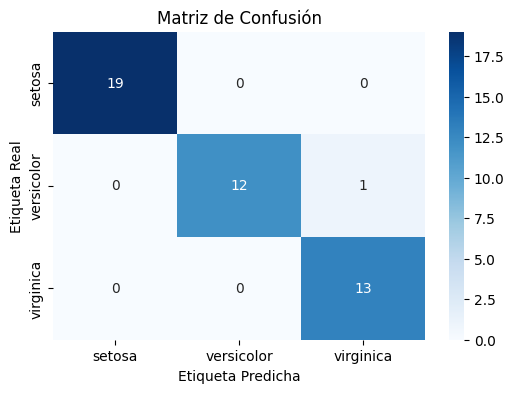

In [ ]:
# Tu código aquí ...


# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data        # características
y = iris.target      # etiquetas (3 especies)

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo Gaussian Naive Bayes
gnb = GaussianNB()

# Entrenar el modelo
gnb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gnb.predict(X_test)

# Calcular las métricas del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Imprimir resultados
print("Exactitud (Accuracy):", accuracy)
print("\nReporte de clasificación:\n", report)
print("Matriz de confusión:\n", cm)

# Visualizar la matriz de confusión utilizando un heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()


<font color='green'>Fin Actividad 3</font>

## <font color='blue'>**Redes Neuronales**</font>

Las **redes neuronales artificiales (RNA)** son modelos computacionales inspirados en la estructura y funcionamiento del cerebro humano. Su unidad básica de procesamiento es la **neurona artificial**, la cual se basa en la **neurona biológica** del sistema nervioso.

En el cerebro, las neuronas están interconectadas a través de **sinapsis**, formando una red capaz de procesar información de manera altamente eficiente. Cada neurona biológica recibe señales a través de sus **dendritas**, procesa la información en su **cuerpo celular**, y si la señal supera un umbral, transmite un impulso a través del **axón** hasta otras neuronas. En las terminaciones sinápticas se encuentran unas vesículas que contienen unas sustancias químicas llamadas **neurotransmisores**, que propagan señales electroquímicas de una neurona a otra. Este comportamiento ha sido la base para el desarrollo de los modelos de redes neuronales artificiales.


### **Comparación entre Neuronas Biológicas y Artificiales**
En la siguiente imagen se muestra la similitud conceptual entre una **neurona biológica** y una **neurona artificial**. Mientras que la neurona biológica recibe señales y decide si activarse, la neurona artificial recibe entradas ponderadas, las suma y pasa el resultado por una **función de activación** no lineal.

<img src='https://drive.google.com/uc?export=view&id=1twkr3xSkQOqi-8wpfwvdZSwTMG7Rz6cZ' width="500" align="center" style="margin-right: 20px">

En términos matemáticos, la neurona artificial opera de la siguiente manera:

$$ u_i = \sum_j w_{ij} x_j $$

Donde:
- $x_j$ representa las **entradas** a la neurona.
- $w_{ij}$ son los **pesos sinápticos**, que determinan la importancia de cada entrada.
- $\sum$ indica la **suma ponderada** de las entradas.
- La función **no lineal** (sigmoide, ReLU, etc.) transforma la salida.

---

### **Estructura de una Red Neuronal Artificial**
Una red neuronal artificial está compuesta por múltiples **neuronas artificiales organizadas en capas**:

1. **Capa de entrada**: Recibe los datos de entrada \( X \).
2. **Capas ocultas**: Procesan la información aplicando combinaciones lineales y funciones de activación.
3. **Capa de salida**: Genera la predicción final \( Y \).

A continuación, se muestra un esquema de una red neuronal con múltiples capas:

<img src='https://drive.google.com/uc?export=view&id=1xn9jPSFuJFptIJVhVrNUJL3ukAju28Jf' width="500" align="center" style="margin-right: 20px">

Las **características principales** de una red neuronal incluyen:

- **Topología**:
  - Número de capas (entrada, ocultas y salida).
  - Número de neuronas por capa.
  - Tipo de conexiones entre neuronas.

- **Tipo de aprendizaje**:
  - **Supervisado**: Se entrena con datos etiquetados.
  - **No supervisado**: Aprende patrones sin etiquetas.
  - **Por refuerzo**: Aprende a tomar decisiones mediante recompensas.

Las redes neuronales han revolucionado el campo del **aprendizaje automático**, permitiendo grandes avances en áreas como reconocimiento de voz, visión por computadora y procesamiento del lenguaje natural. En secciones posteriores, exploraremos cómo se entrenan estos modelos y cómo pueden ser utilizados en problemas del mundo real.

### **Aplicación de Redes Neuronales: Resolviendo XOR**

Las **compuertas lógicas** son funciones fundamentales en electrónica y computación que reciben **valores binarios (0 o 1) como entrada** y producen una **salida binaria** basada en una operación lógica específica. Son la base de circuitos digitales y también pueden representarse mediante modelos matemáticos.

#### **Compuertas Lógicas y su Separabilidad Lineal**
Algunas compuertas pueden resolverse con modelos lineales simples, como el **Perceptrón**. Estas incluyen:

- **AND**: La salida es 1 solo si ambas entradas son 1.
- **OR**: La salida es 1 si al menos una entrada es 1.
- **NAND** y **NOR**: Son las versiones negadas de AND y OR.

Podemos visualizar estos casos en un gráfico 2D, donde los puntos pueden separarse con una línea recta.

| Entrada 1 | Entrada 2 | AND | OR |
|-----------|-----------|-----|----|
| 0         | 0         | 0   | 0  |
| 0         | 1         | 0   | 1  |
| 1         | 0         | 0   | 1  |
| 1         | 1         | 1   | 1  |

En la siguiente imagen se observa cómo las compuertas **AND** y **OR** pueden resolverse mediante una única línea de decisión, mientras que **XOR no puede separarse con una sola línea recta**:

<br>


<img src='https://drive.google.com/uc?export=view&id=1mCjE6UjJcaKx5TpCRR2xSP5yfmWJvZIW' width="500" align="center" style="margin-right: 20px">


<br>

En los gráficos:
- **Los puntos verdes representan la salida 1 y los puntos rojos la salida 0.**
- **La línea amarilla representa una posible frontera de decisión**.
- En los casos de **AND y OR**, una única línea recta puede separar las clases.
- En **XOR**, ninguna línea recta puede separar los puntos de salida 1 de los de salida 0.

#### **¿Por qué XOR es diferente?**
La compuerta **XOR (exclusive OR)** tiene una particularidad: **su salida es 1 solo si una entrada es 1 y la otra es 0**. Su tabla de verdad es:

| Entrada 1 | Entrada 2 | XOR |
|-----------|-----------|-----|
| 0         | 0         | 0   |
| 0         | 1         | 1   |
| 1         | 0         | 1   |
| 1         | 1         | 0   |

En este caso, **no es posible separar las clases con una única línea recta**. Si intentamos trazar una línea que divida los valores de salida 1 y 0, veremos que **no existe una solución lineal**.

Este problema se llama **no linealmente separable**, y es aquí donde entran en juego las **redes neuronales multicapa**. Al agregar **una capa oculta con múltiples neuronas y funciones de activación no lineales**, la red neuronal puede aprender a modelar la función XOR.


También podemos escribirlo en notación matemática:

- XOR(0,0) = 0
- XOR(0,1) = 1
- XOR(1,0) = 1
- XOR(1,1) = 0

#### **¿Y por qué son importantes en el contexto de las Redes Neuronales?**
Las compuertas XOR son importantes en el contexto de las redes neuronales porque representan el caso más simple de un problema no linealmente separable, lo que demuestra la necesidad de capas ocultas y funciones de activación no lineales. Resolver XOR con una red neuronal valida su capacidad para modelar patrones complejos, sentando las bases del aprendizaje profundo (Deep Learning).

#### **📌 Próximo paso: Implementación de una Red Neuronal para XOR**
En la siguiente sección, construiremos una **red neuronal artificial** con una capa oculta que permitirá resolver el problema de XOR, demostrando cómo este tipo de modelos pueden capturar relaciones no lineales.

Utilizaremos **Keras** que es una librería de alto nivel, para que nos sea más fácil describir las capas de la red que creamos y en background es decir, el motor que ejecutará la red neuronal y la entrenará estará la implementación de Google llamada **Tensorflow**.

Cargamos las librerías. Usamos numpy para el manejo de arrays.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Se define la entrada y salida `training_data` y `target_data`) en formato float32 para compatibilidad con TensorFlow.


Creamos los arrays de entrada y salida.

In [ ]:
# Cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")

# Resultados esperados de la compuerta XOR
target_data = np.array([[0], [1], [1], [0]], dtype="float32")



Como se puede ver son las cuatro entradas posibles de la función $XOR [0,0], [0,1], [1,0],[1,1]$ y sus cuatro salidas: $0, 1, 1, 0$\.
<br><br><br>
Ahora crearemos la arquitectura de nuestra red neuronal:

Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.


In [ ]:
# Definimos el modelo de la red neuronal
model = Sequential()

Se construye la red neuronal con model.add():
- Capa oculta: 4 neuronas con activación ReLU.
- Capa de salida: 1 neurona con activación sigmoide para clasificación binaria.

¿Por qué 4 neuronas en la capa oculta?
- XOR es un problema no linealmente separable
    - Un Perceptrón simple (sin capa oculta) no puede resolver XOR porque no es linealmente separable.
	- Necesitamos una capa oculta que introduzca no linealidad.
- Uso del mínimo número de neuronas que permite resolver XOR
	- Se ha demostrado que con 2 neuronas en la capa oculta ya es posible aprender la función XOR.
	- Sin embargo, usar 4 neuronas proporciona estabilidad en el aprendizaje y permite generalizar mejor.
- Fórmula empírica
	- Una regla común para elegir el número de neuronas ocultas es:
<br><br>
$$
\text{Neuronas en capas ocultas} \approx 2^{\text{Neuronas en capa de entrada}}.
$$
<br>
	- En este caso, tenemos 2 entradas →  2^2 = 4  neuronas en la capa oculta.
- Flexibilidad para aprender variaciones
    - Aunque podríamos resolver XOR con menos neuronas, usar 4 permite mayor capacidad de ajuste y ayuda a la red a converger más rápido.

¿Por qué solo 1 neurona en la capa de salida?
- XOR es un problema de clasificación binaria
	- La salida esperada es 0 o 1, por lo que una única neurona es suficiente.
	- No necesitamos varias neuronas, como en problemas de clasificación con más de dos clases.
- Cada entrada genera una sola predicción
	- En redes neuronales, el número de neuronas en la salida suele coincidir con el número de clases.
	- Como XOR solo tiene dos posibles salidas, usamos una neurona con activación sigmoide que produzca una probabilidad de pertenecer a la clase 1.

In [ ]:
# Definimos las capas del modelo
model.add(Dense(4, input_dim=2, activation='relu'))  # Capa oculta con 4 neuronas
                                                     # La entrada es de 2 dim
                                                     # Función de activación tipo ReLU

#model.add(Dense(4, activation='relu')) # El modelo podría tener más capas

model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide
                                           # De un nodo
                                           # no colocamos input porque los infiere de la capa anterior


Usamos ReLU en la capa oculta porque introduce no linealidad, permitiendo que la red neuronal aprenda patrones complejos como XOR, además de evitar el problema del gradiente desaparecido y acelerar la convergencia. En la capa de salida, utilizamos sigmoide porque transforma la salida en un valor entre 0 y 1, lo que facilita la interpretación como una probabilidad en problemas de clasificación binaria.

La compilación del modelo en Keras es un paso fundamental en el entrenamiento de una red neuronal, donde se define cómo aprenderá el modelo ajustando sus pesos. En este proceso, se establecen tres elementos clave:
- Optimizador (`optimizer='adam'`):
	- Determina cómo se ajustan los pesos de la red para minimizar el error.
	- adam (Adaptive Moment Estimation) es un optimizador eficiente basado en gradiente descendente adaptativo, que ajusta la tasa de aprendizaje de forma dinámica para acelerar la convergencia y mejorar la estabilidad del entrenamiento.
- Función de pérdida (`loss='binary_crossentropy'`):
	- Mide qué tan lejos están las predicciones de los valores reales.
	- binary_crossentropy es ideal para clasificación binaria, ya que evalúa la diferencia entre la probabilidad predicha y la etiqueta real, penalizando predicciones incorrectas de manera más efectiva que el error cuadrático medio.
- Métrica de evaluación (`metrics=['accuracy']`):
	- Permite monitorear el rendimiento del modelo durante el entrenamiento.
	- accuracy calcula el porcentaje de predicciones correctas, comparando las salidas del modelo con las etiquetas verdaderas.

In [ ]:
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Ahora entrenamos a nuestra red. Indicamos con `model.fit()` las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (`epochs`) de entrenamiento. Este es un ejemplo sencillo, pero recuerda que en modelos más grandes y complejos, necesitarán más iteraciones y a la vez será más lento el entrenamiento.

In [ ]:
# Entrenamos el modelo
model.fit(training_data, target_data, epochs=50, verbose=1)  # Prueba con 50, 100, 1000 y 5000 épocas


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step - accuracy: 0.5000 - loss: 0.6883
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.6880
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6878
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6875
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6872
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6869
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6866
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6863
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6860
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6858
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.6855
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.6852


Para evaluar el rendimiento del modelo después del entrenamiento, utilizamos la función evaluate(), que mide la precisión y la pérdida en los datos de entrada. Esto nos permite verificar si la red neuronal ha aprendido correctamente la función XOR y qué tan bien clasifica las combinaciones de entrada. A continuación, evaluamos el modelo y mostramos su precisión en porcentaje.

In [ ]:
# Evaluamos el modelo
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5000 - loss: 0.6748

compile_metrics: 50.00%


In [ ]:
# Evaluamos el modelo en los datos de entrada
predictions = model.predict(training_data)
binary_predictions = (predictions > 0.5).astype(int)  # Convertimos probabilidades en 0 o 1

# Mostramos los resultados
for i in range(len(training_data)):
    print(f"XOR({training_data[i][0]:.0f}, {training_data[i][1]:.0f}) = {binary_predictions[i][0]:.0f} (Esperado: {target_data[i][0]:.0f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
XOR(0, 0) = 0 (Esperado: 0)
XOR(0, 1) = 1 (Esperado: 1)
XOR(1, 0) = 0 (Esperado: 1)
XOR(1, 1) = 1 (Esperado: 0)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

## <font color='green'>Actividad 4</font>

Una empresa agrícola quiere automatizar su proceso productivo, para ello requiere implementar un modelo de machine learning, específicamente una red neuronal artificial (RNA). Se le ha solicitado a Ud implementar un modelo que permita clasificar entre cuatro (4) tipos de frutas, considerando la forma, la textura, el peso y la tonalidad (color principal). El diseño del sistema donde debe incorporarse la RNA se muestra en la siguiente figura.

<img src='https://drive.google.com/uc?export=view&id=1uua96vfl4WKGY5zdH8cRBYrWwLtqQGHB' width="500" align="center" style="margin-right: 20px">

El vector de entrada para la RNA tiene la siguiente forma: $P = [forma, textura, peso, tonalidad]$.

Los valores de cada parámetro son:
* Forma:
  * 1, si la fruta es redonda
  * 0, si la fruta es alargada
  * -1, si la fruta es elíptica
* Textura:
  * 1, si la superficie de la fruta es suave
  * -1, si la superficie de la fruta es rugosa
* Peso:
  * 1, si el peso de la fruta es ≥ 200 gr
  * 0, si el peso de la fruta es < 200 gr y ≥ 50 gr
  * -1, si el peso de la fruta es < 50 gr
* Tonalidad:
  * 1, si la tonalidad es roja o naranja
  * 0, si la tonalidad es amarilla
  * -1, si la tonalidad es verde

La salida de la red es de la siguiente forma:
* Manzana = [0, 0]
* Naranja = [1, 1]
* Sandía = [1, 0]
* Plátano = [0, 1]

Otros datos:

* Las manzanas y naranjas son redondas
* La sandía es elíptica
* La sandía pesa 1,5 kgr, las manzanas y naranjas pesan 0,15 kgr y un plátano pesa 0,04 kgr

Diseñe una RNA perceptron multicapa que entregue la solución al problema planteado.

In [ ]:
# Tu código aquí ...

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Datos de entrada (P = [forma, textura, peso, tonalidad])
# Se construyen ejemplos de cada fruta según lo descrito.
X = np.array([
    [1,   1,  0,  1],    # Manzana: redonda, suave, peso entre 50-200 gr, tonalidad roja/orange
    [1,  -1,  0,  1],    # Naranja: redonda, rugosa, peso entre 50-200 gr, tonalidad naranja
    [-1, -1,  1, -1],    # Sandía: elíptica, rugosa, peso ≥200 gr, tonalidad verde (exterior)
    [0,   1, -1,  0]     # Plátano: alargada, suave, peso <50 gr, tonalidad amarilla
])

# Salidas deseadas
y = np.array([
    [0, 0],  # Manzana
    [1, 1],  # Naranja
    [1, 0],  # Sandía
    [0, 1]   # Plátano
])

# Diseño de la RNA (MLP)
model = Sequential()
# Capa de entrada: 4 neuronas; primera capa oculta con 4 neuronas y activación tangente hiperbólica
model.add(Dense(4, input_dim=4, activation='tanh'))
# Segunda capa oculta con 4 neuronas
model.add(Dense(4, activation='tanh'))
# Capa de salida: 2 neuronas (se usan funciones sigmoides para aproximar valores entre 0 y 1)
model.add(Dense(2, activation='sigmoid'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Visualización de la estructura del modelo
model.summary()

# Entrenamiento del modelo (500 épocas)
model.fit(X, y, epochs=500, verbose=0)

# Predicción sobre los mismos datos de entrenamiento
predictions = model.predict(X)
print("Predicciones:")
print(predictions)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicciones:
[[0.3169618  0.20209184]
 [0.6967349  0.84150404]
 [0.6934583  0.23887965]
 [0.27934057 0.7285276 ]]


<font color='green'>Fin Actividad 4</font>



## <font color='blue'>**Máquinas de Soporte Vectorial (SVM)**</font>

Las **máquinas de soporte vectorial (SVM)** son una clase particularmente poderosa y flexible de **algoritmos supervisados** tanto para clasificación como para regresión.

SVM corresponde a un tipo de clasificación **discriminativa**, que es la que busca modelar cada clase, encontrando una línea o curva (en dos dimensiones) o un plano (en N-dimensiones) que divide las clases entre sí.


### Aplicación de SVM


Como ejemplo de esto, considere el caso simple de una tarea de clasificación, en la que las dos clases de puntos están bien separadas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

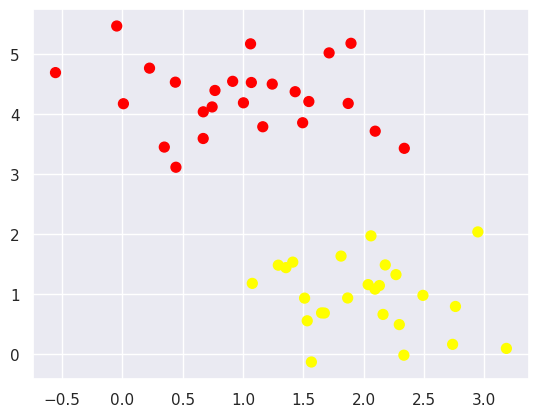

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Un clasificador discriminativo lineal intentaría trazar una línea recta que separe los dos conjuntos de datos y, por lo tanto, crearía un modelo de clasificación. Para datos bidimensionales como el que se muestra aquí, esta es una tarea que podríamos hacer a mano. Pero inmediatamente vemos un problema: **¡hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases!**

Podemos dibujarlos de la siguiente manera:

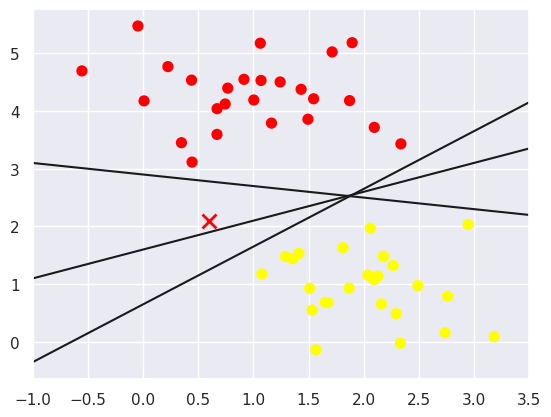

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Se trata de tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. Dependiendo de cuál se elija, a un nuevo punto de datos (por ejemplo, el marcado con la "X" en este gráfico) se le asignará una etiqueta diferente. Evidentemente, nuestra simple intuición de "trazar una línea divisoria entre clases" no es suficiente, y necesitamos pensar un poco más.

Las máquinas de soporte vectorial ofrecen una forma mejorada de solucionar este problema.

La idea es la siguiente: en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un margen de cierto ancho, hasta el punto más cercano. A continuación, se muestra un ejemplo de cómo podría verse esto:

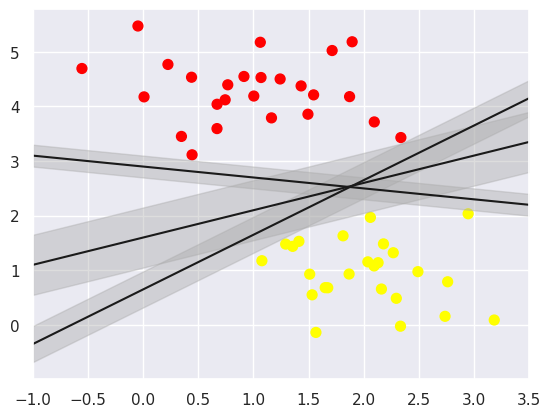

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

En las SVM, la línea que maximiza este margen es la que elegiremos como modelo óptimo. Las SVM son un ejemplo de estimador de margen máximo.

Veamos el resultado de un ajuste real a los datos del ejemplo: utilizaremos el clasificador de vectores de soporte de Scikit-Learn para entrenar un modelo SVM sobre estos datos. Por el momento, usaremos un kernel lineal y estableceremos el parámetro C en un número muy grande (discutiremos el significado de estos con más profundidad momentáneamente).

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) # Parámetros claves
                                     # kernel: parámetro de preprocesamineto; el kernel aumenta la dimensionalidad para separaer más los puntos
                                     # C, parámetro de regularización. Podemos equivocarnos; el problema no tiene solución
                                     # Permito equivocarme y castigo ese error. Hata que punto acepto una solución no óptima
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Esta es la **línea divisoria que maximiza el margen entre los dos conjuntos de puntos**. Observe que algunos de los puntos de entrenamiento solo tocan el margen. Estos puntos son los elementos fundamentales de este ajuste y se conocen como vectores de soporte, y dan nombre al algoritmo. En Scikit-Learn, los valores de estos puntos se almacenan en el atributo *support_vectors_* del clasificador:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## <font color='green'>Actividad 5</font>

La manera más simple de realizar la separación es mediante una línea recta, un plano o un hiperplano N-dimensional.

Desafortunadamente los universos a estudiar no se suelen presentar en casos idílicos de dos dimensiones como en el ejemplo anterior, sino que un algoritmo SVM debe tratar con:
1. más de dos variables predictoras,
2. curvas no lineales de separación,
3. casos donde los conjuntos de datos no pueden ser completamente separados,
4. clasificaciones en más de dos categorías.

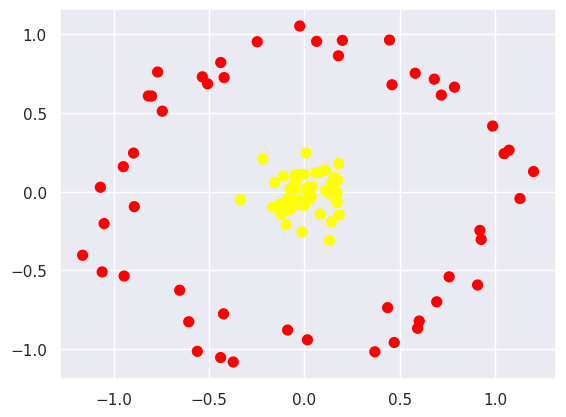

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Implemente un SVM que sea capaz de separar las clases rojas y amarillas.

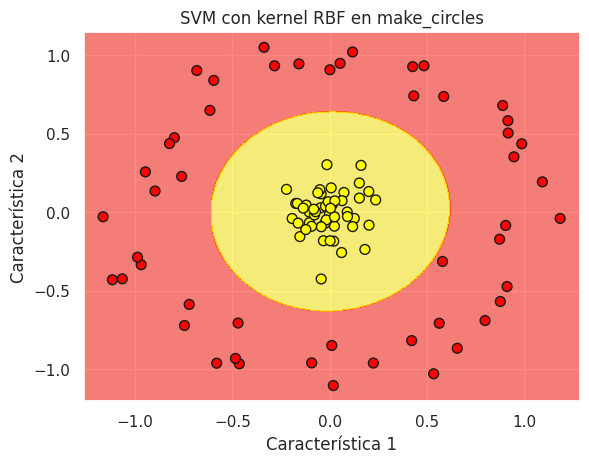

In [ ]:
# Tu código aquí ...

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Generar el dataset con make_circles
X, y = make_circles(100, factor=.1, noise=.1)

# Crear y entrenar el SVM con kernel RBF
clf = SVC(kernel='rbf', C=1.0, gamma='auto')
clf.fit(X, y)

# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predecir la clase para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión y los puntos
plt.contourf(xx, yy, Z, alpha=0.5, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k')
plt.title("SVM con kernel RBF en make_circles")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


<font color='green'>Fin Actividad 5</font>

## <font color='blue'>**Árboles de Decisión y Random Forest**</font>

**Random Forest** es un ejemplo de un modelo de ensamblado (ensemble learning) basado en árboles de decisión, que mejora la precisión y la estabilidad del modelo al combinar múltiples estimadores.

Los árboles de decisión son modelos altamente intuitivos para clasificar o etiquetar objetos, funcionando a través de una serie de preguntas diseñadas para refinar progresivamente la clasificación. Por ejemplo, si se quisiera clasificar un animal encontrado durante una caminata, un árbol de decisión haría preguntas como ¿tiene plumas? o ¿es cuadrúpedo? para llegar a una conclusión.

La fortaleza de Random Forest radica en su capacidad para reducir el sobreajuste que pueden sufrir los árboles de decisión individuales. Lo logra generando múltiples árboles a partir de subconjuntos aleatorios de datos y características, y combinando sus predicciones mediante voto mayoritario (para clasificación) o promedio (para regresión). Esta técnica aumenta la robustez del modelo, haciéndolo más preciso y menos sensible a variaciones en los datos.


Por ejemplo, si quisiera construir un árbol de decisiones para clasificar un animal con el que se encuentra durante una caminata, puede construir el que se muestra aquí:

<img src='https://drive.google.com/uc?export=view&id=1Bt1Cnju5rDgmbZpUNRAY59TGDkKoe1Sl' width="800" align="center" style="margin-right: 20px">

La división binaria hace que esto sea extremadamente eficiente: en un árbol bien construido, cada pregunta reducirá el número de opciones a aproximadamente la mitad, reduciendo muy rápidamente las opciones incluso entre un gran número de clases. El truco, por supuesto, está en decidir qué preguntas hacer en cada paso. En las implementaciones de aprendizaje automático de árboles de decisión, las preguntas generalmente toman la forma de divisiones alineadas con el eje en los datos: es decir, cada nodo del árbol divide los datos en dos grupos utilizando un valor de corte dentro de una de las características.

### **Aplicación de Árboles de Decisión y Random Forest**

Considere los siguientes datos bidimensionales, que tienen una de cuatro etiquetas de clase:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

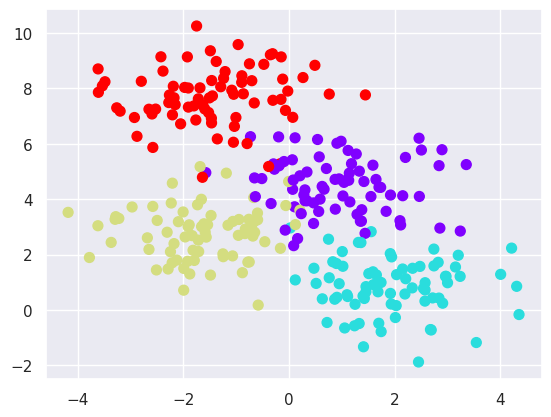

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Un árbol de decisión simple construido sobre estos datos dividirá iterativamente los datos a lo largo de uno u otro eje de acuerdo con algún criterio cuantitativo, y en cada nivel asignará la etiqueta de la nueva región de acuerdo con un voto mayoritario de puntos dentro de ella. En la figura se presenta una visualización de los primeros cuatro niveles de un clasificador de árbol de decisión para estos datos:

<img src='https://drive.google.com/uc?export=view&id=131jNACEMFj0q_4maHJLeq4xPeNrcdLD3' width="1000" align="center" style="margin-right: 20px">

Observe que después de la primera división, todos los puntos de la rama superior permanecen sin cambios, por lo que no es necesario subdividir más esta rama. A excepción de los nodos que contienen todos de un color, en cada nivel cada región se divide nuevamente a lo largo de una de las dos características.

Este proceso de ajustar un árbol de decisiones a nuestros datos se puede realizar en Scikit-Learn con el estimador DecisionTreeClassifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Graficar los puntos de entrenamiento
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap, zorder=3)

    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Ajustar el modelo
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Crear la gráfica de regiones de decisión
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)
    # Agregar bordes a las regiones
    ax.contour(xx, yy, Z, levels=np.arange(n_classes + 1) - 0.5,
               colors='black', linewidths=0.3, zorder=2)

    ax.set(xlim=xlim, ylim=ylim)

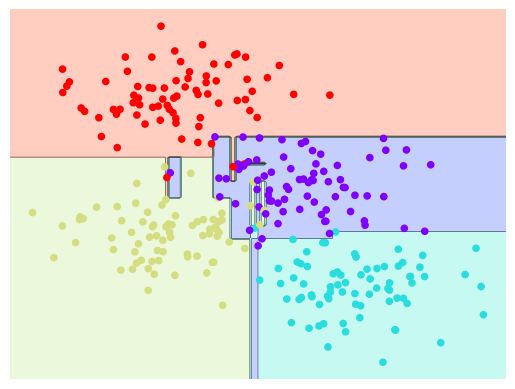

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

A medida que aumenta la profundidad del árbol, tendemos a obtener regiones de clasificación de formas muy extrañas; por ejemplo, a una profundidad de cinco, hay una región púrpura alta y delgada entre las regiones amarilla y azul. Está claro que esto es menos un resultado de la verdadera distribución intrínseca de los datos y más un resultado de las propiedades particulares de muestreo o ruido de los datos. Es decir, este árbol de decisiones, incluso a solo cinco niveles de profundidad, claramente sobrepasa nuestros datos. **Esto se conoce como sobreajuste (over-fitting).**

El sobreajuste resulta ser una propiedad general de los árboles de decisión: es muy fácil profundizar demasiado en el árbol y, por lo tanto, ajustar los detalles de los datos particulares en lugar de las propiedades generales de las distribuciones de las que se extraen. Otra forma de ver este ajuste excesivo es observar modelos entrenados en diferentes subconjuntos de datos; por ejemplo, en esta figura entrenamos dos árboles diferentes, cada uno en la mitad de los datos originales:

<img src='https://drive.google.com/uc?export=view&id=1J_fwaaU2MQcbnSleAvpbS3E3Y4Z1r--D' width="1000" align="center" style="margin-right: 20px">

### **Ensembles de estimadores: Random Forests**

El concepto de ensembles se basa en la combinación de múltiples estimadores para mejorar la precisión y reducir el sobreajuste. Uno de los enfoques más utilizados en esta técnica es el bagging (Bootstrap Aggregating), que consiste en entrenar varios modelos en subconjuntos aleatorios de los datos y luego promediar sus predicciones para obtener una clasificación más estable y precisa.

Un caso particular del bagging es el Random Forest, que se construye a partir de múltiples árboles de decisión aleatorios. Cada árbol en el bosque se entrena con una muestra diferente de los datos y realiza predicciones de forma independiente. Finalmente, la clasificación final se obtiene mediante un voto mayoritario en problemas de clasificación o un promedio de predicciones en problemas de regresión.

En Scikit-Learn, el bagging puede implementarse manualmente utilizando el metaestimador BaggingClassifier, como se muestra a continuación:

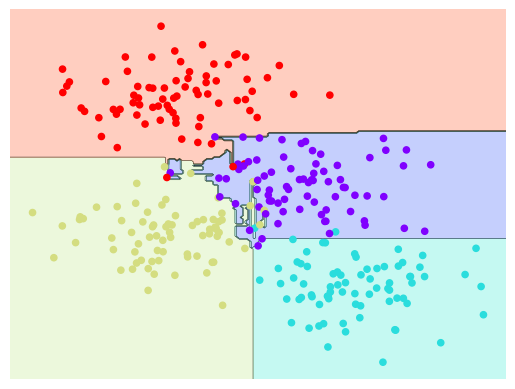

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, # número de muestras
                        max_samples=0.8, #
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

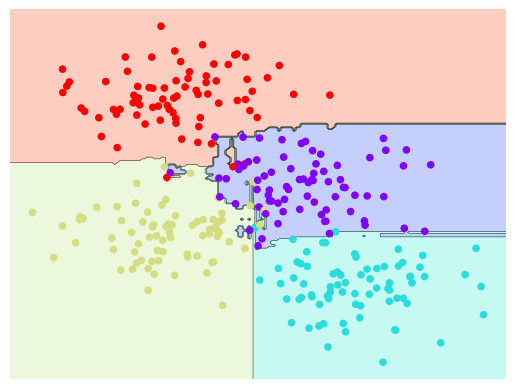

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## <font color='green'>Actividad 6</font>

Random forests también pueden funcionar en el caso de regresión (es decir, variables continuas en lugar de categóricas). El estimador a utilizar para esto es **RandomForestRegressor**, y la sintaxis es muy similar a la que vimos anteriormente.

Considere los siguientes datos, extraídos de la combinación de una oscilación rápida y lenta:

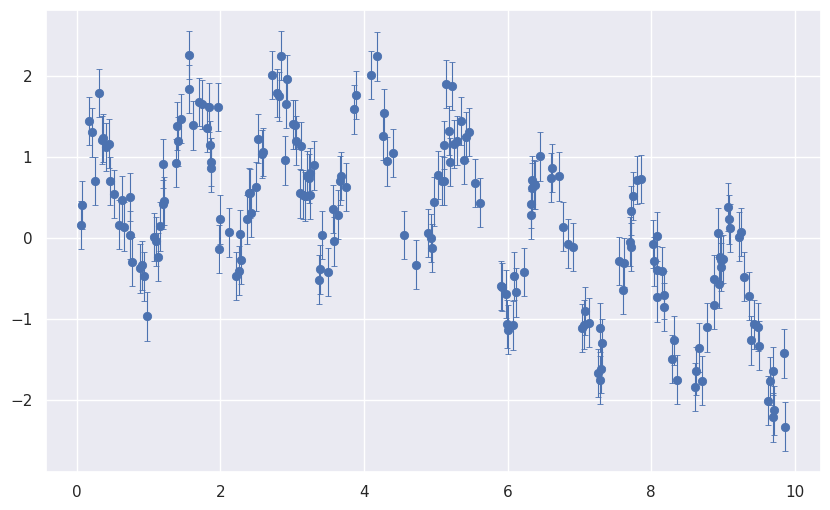

In [ ]:
# Inicializar la semilla aleatoria
rng = np.random.RandomState(42)

# Generar datos aleatorios
x = 10 * rng.rand(200)

# Definir el modelo con oscilaciones y ruido
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

# Generar los valores de salida
y = model(x)

# Graficar con líneas de error más delgadas
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=0.3, fmt='o', elinewidth=0.8, capsize=2, capthick=0.8, markeredgewidth=0.6)

# Mostrar el gráfico
plt.show()

1. Usando el regresor de random forests encuentre la curva de mejor ajuste a los datos generados anteriormente.
2. Grafique su resultado.

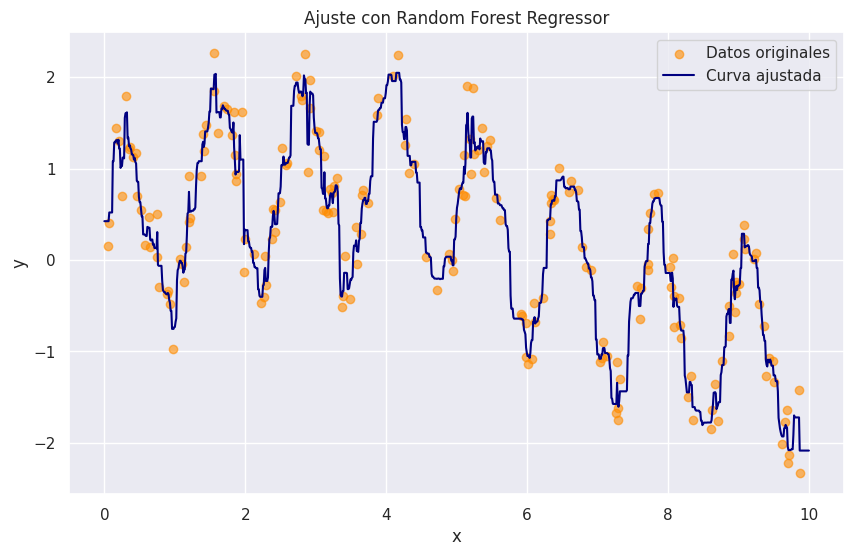

In [ ]:
# Tu código aquí ...

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Inicializar la semilla aleatoria
rng = np.random.RandomState(42)

# Generar datos aleatorios
x = 10 * rng.rand(200)

# Definir el modelo con oscilaciones y ruido
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return fast_oscillation + slow_oscillation + noise

# Generar la variable dependiente
y = model(x)

# Ajustar la forma de x para el modelo (scikit-learn requiere 2D)
X = x.reshape(-1, 1)

# Crear y entrenar el regresor Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

# Crear una malla de valores para predecir la curva ajustada
x_grid = np.linspace(0, 10, 1000).reshape(-1, 1)
y_pred = regressor.predict(x_grid)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkorange', label='Datos originales', alpha=0.6)
plt.plot(x_grid, y_pred, color='navy', label='Curva ajustada')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste con Random Forest Regressor")
plt.legend()
plt.show()


<font color='green'>Fin Actividad 6</font>


<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">


##<font color='red'>**Contenido opcional**</font>

## <font color='blue'>**Bonus: Uso de método `summary` de `statsmodels.api`**</font>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           3.83e-62
Time:                        00:52:52   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

1. $R^2$ bajo y P-value bajo ($\text{p-value} \le 0.05$): <br>
Significa que su modelo no explica gran parte de la variación de los datos pero es significativa (mejor que no tener un modelo)

2. $R^2$ bajo y P-value alto ($\text{p-value} \gt 0.05$): <br>
Significa que su modelo no explica gran parte de la variación de los datos y no es significativo (peor escenario)

3. $R^2$ alto y P-value bajo: <br>
Significa que su modelo explica mucha variación dentro de los datos y es significativo (mejor escenario)

4. $R^2$ alto P-value alto: <br>
Significa que su modelo explica mucha variación dentro de los datos pero no es significativa (el modelo no tiene valor)

## <font color='blue'> __Implementación de un Percertron para puertas AND__</font>

Veamos un Perceptrón simple capaz de aprender la función lógica AND. Las compuertas del tipo AND y OR son linealmente separables, lo que significa que se pueden resolver con una sola neurona artificial sin necesidad de capas ocultas a diferencia de la de tipo XOR. En este ejemplo, implementaremos un perceptrón con dos entradas y una sola salida, que aprenderá a modelar la función AND.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Datos de entrenamiento para la compuerta lógica AND
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype="float32")
target_data = np.array([[0], [0], [0], [1]], dtype="float32")  # Salidas de la compuerta AND

# Definir el modelo del Perceptrón
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid', name='perceptron'))  # Solo una neurona, ya que AND es linealmente separable

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(training_data, target_data, epochs=500, verbose=0)

# Evaluar el modelo
scores = model.evaluate(training_data, target_data, verbose=0)
print(f"Precisión del perceptrón en la compuerta AND: {scores[1] * 100:.2f}%")

# Evaluamos el modelo en los datos de entrada
predictions = model.predict(training_data)
binary_predictions = (predictions > 0.5).astype(int)  # Convertimos probabilidades en 0 o 1

# Mostramos los resultados
for i in range(len(training_data)):
    print(f"XOR({training_data[i][0]:.0f}, {training_data[i][1]:.0f}) = {binary_predictions[i][0]:.0f} (Esperado: {target_data[i][0]:.0f})")

model.summary()

Precisión del perceptrón en la compuerta AND: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
XOR(0, 0) = 0 (Esperado: 0)
XOR(0, 1) = 0 (Esperado: 0)
XOR(1, 0) = 1 (Esperado: 0)
XOR(1, 1) = 1 (Esperado: 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ perceptron (Dense)                   │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

## <font color='blue'> __Solución full Python a la Actividad #4__</font>

Revisa el código mostrado a continuación, deconstrúyelo y entiéndelo. Te servirá mucho para entender la dinámica interna de una red neuronal.

In [ ]:
import numpy as np
def sigmoid(x):return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):return sigmoid(x) * (1.0 - sigmoid(x))


def tanh(x):return np.tanh(x)

def tanh_derivada(x):return 1.0 - x**2

class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada
        self.weights = []
        self.deltas = []

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 4320 == 0: print('epochs:', k)

    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])
    def get_deltas(self):
        return self.deltas

In [ ]:
nn = NeuralNetwork([4,3,2],activation ='tanh')

In [ ]:
X = np.array([[1,1,0,1],   # Manzana
              [1,-1,0,1],  # Naranja
              [-1,1,1,-1], # Sandía
              [0,1,-1,0]]) # Plátano

X

array([[ 1,  1,  0,  1],
       [ 1, -1,  0,  1],
       [-1,  1,  1, -1],
       [ 0,  1, -1,  0]])

In [ ]:
Y = np.array([[0,0],    # Manzana
              [1,1],    # Naranja
              [1,0],    # Sandia
              [0,1]])   # Platano
Y

array([[0, 0],
       [1, 1],
       [1, 0],
       [0, 1]])

In [ ]:
nn.fit(X, Y, learning_rate=0.06,epochs=1000)

index=0
for e in X:
    print("X:",e,"Y:",Y[index],"Network:",nn.predict(e).round(2))
    index=index+1

epochs: 0
X: [1 1 0 1] Y: [0 0] Network: [0.   0.01]
X: [ 1 -1  0  1] Y: [1 1] Network: [0.95 0.96]
X: [-1  1  1 -1] Y: [1 0] Network: [0.95 0.  ]
X: [ 0  1 -1  0] Y: [0 1] Network: [0.   0.94]


In [ ]:
# ARQUITECTURA DE LA RED
model_fruta = Sequential() # Instanciamos
model_fruta.add(Dense(16, input_dim=4, activation='relu')) # Capa oculta
                                                     # Método add agrega una capa densa, con 16 nodos
                                                     # La entrada es de 2 dim
                                                     # Función de activación tipo relu
# model.add(Dense(3, activation='relu')) # Si ponemos muchas capas el
model_fruta.add(Dense(2, activation='sigmoid')) # Otra capa (de salida)
                                          # De un nodo
                                          # no colocamos input porque los infiere de la capa anterior

# Cuando se madela más de una clase. Modelamos la probabilidad más que la clase

In [ ]:
model_fruta.compile(loss='mean_squared_error', # función de pérdida
                    optimizer='adam', # Cómo aprende la red
                                # 'adam' es un método moderno (2014) para actualizar los pesos
                    metrics=['binary_accuracy'])

In [ ]:
model_fruta.fit(X, Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - binary_accuracy: 0.3750 - loss: 0.2807   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - binary_accuracy: 0.3750 - loss: 0.2792
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - binary_accuracy: 0.3750 - loss: 0.2778
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - binary_accuracy: 0.3750 - loss: 0.2763
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - binary_accuracy: 0.3750 - loss: 0.2749
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - binary_accuracy: 0.3750 - loss: 0.2735
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - binary_accuracy: 0.3750 - loss: 0.2720
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - binary_accuracy: 0.3750 - loss: 0.2706
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.3750 - loss: 0.2692
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - binary_accuracy: 0.3750 - loss: 0.2678
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - binary_accuracy: 0.3750 - loss: 0

In [ ]:
scores = model_fruta.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - binary_accuracy: 0.8750 - loss: 0.1624

compile_metrics: 87.50%


In [ ]:
print (model_fruta.predict(X).round())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
print (model_fruta.predict(np.array([[1, 0, -1, 1]])).round())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[1. 1.]]


<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">
<br clear="left">

# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>

En lugar de usar únicamente un modelo de regresión lineal con la característica BMI del dataset de diabetes, veremos como se comporta un modelo de regresión polinómica (por ejemplo, de grado 2) versus el modelo lineal. Esto permitirá ver si existe alguna mejora (o sobreajuste) al capturar posibles relaciones no lineales en los datos.

Regresión Lineal:
 MSE: 2548.07239872597
 R²: 0.47257544798227147

Regresión Polinómica (grado 2):
 MSE: 2540.6603252467803
 R²: 0.47410967029724127


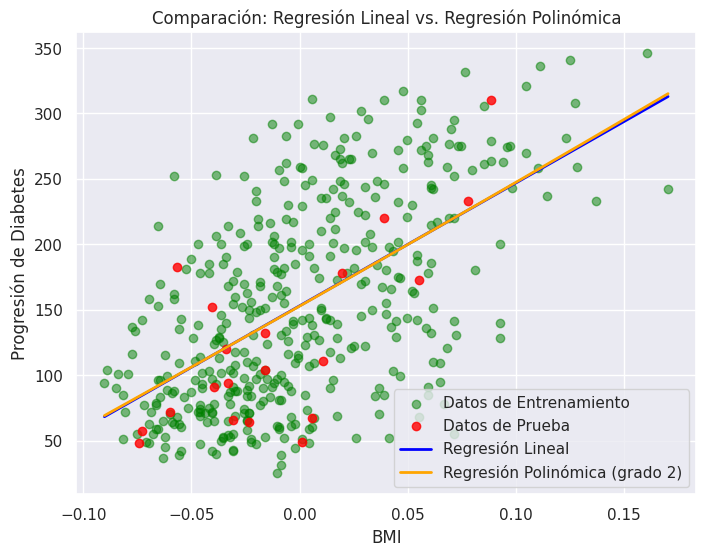

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Cargar el dataset de diabetes y seleccionar la característica BMI
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]  # Usamos el BMI

# Dividir los datos en entrenamiento y prueba
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# --- Modelo de Regresión Lineal ---
lin_reg = linear_model.LinearRegression()
lin_reg.fit(diabetes_X_train, diabetes_y_train)
y_pred_lin = lin_reg.predict(diabetes_X_test)

# --- Modelo de Regresión Polinómica (grado 2) ---
poly_reg_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', linear_model.LinearRegression())
])
poly_reg_model.fit(diabetes_X_train, diabetes_y_train)
y_pred_poly = poly_reg_model.predict(diabetes_X_test)

# Evaluar ambos modelos con MSE y R^2
mse_lin = mean_squared_error(diabetes_y_test, y_pred_lin)
r2_lin = r2_score(diabetes_y_test, y_pred_lin)
mse_poly = mean_squared_error(diabetes_y_test, y_pred_poly)
r2_poly = r2_score(diabetes_y_test, y_pred_poly)

print("Regresión Lineal:")
print(" MSE:", mse_lin)
print(" R²:", r2_lin)
print("\nRegresión Polinómica (grado 2):")
print(" MSE:", mse_poly)
print(" R²:", r2_poly)

# Visualización de los modelos
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_X_train, diabetes_y_train, color='green', alpha=0.5, label='Datos de Entrenamiento')
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', alpha=0.8, label='Datos de Prueba')

x_plot = np.linspace(diabetes_X.min(), diabetes_X.max(), 100).reshape(-1, 1)
plt.plot(x_plot, lin_reg.predict(x_plot), color='blue', linewidth=2, label='Regresión Lineal')
plt.plot(x_plot, poly_reg_model.predict(x_plot), color='orange', linewidth=2, label='Regresión Polinómica (grado 2)')

plt.xlabel('BMI')
plt.ylabel('Progresión de Diabetes')
plt.title('Comparación: Regresión Lineal vs. Regresión Polinómica')
plt.legend()
plt.show()



**Carga y Preprocesamiento:**

Se utiliza la misma característica (BMI) del dataset de diabetes y se divide en conjuntos de entrenamiento y prueba.

**Modelos a Comparar:**

**Regresión Lineal:** Ajusta una línea recta a los datos.

**Regresión Polinómica (grado 2):** Se transforma la característica para incluir términos cuadráticos y se ajusta un modelo lineal sobre esa transformación. Esto permite capturar relaciones curvilíneas.

**Evaluación:**

Se calcula el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²) para ambos modelos, lo que ayudará a ver cuál modelo se ajusta mejor a los datos de prueba.

**Visualización:**

Se trazan los datos de entrenamiento y prueba, junto con la línea de regresión de ambos modelos para visualizar cómo se ajustan.


# <font color='purple' style='bold' size=5>**FIN EXPERIMENTO** </font>

# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>

El aprendizaje supervisado es un paradigma fundamental en el campo del machine learning en el que el modelo aprende a partir de datos etiquetados para predecir o clasificar nuevos datos. Este enfoque se ha aplicado con éxito en tareas tan variadas como la detección de spam, la predicción de precios, el reconocimiento de imágenes y el análisis de sentimientos.

**Scikit-learn**

¿Qué es?
Scikit-learn es una biblioteca de Python que implementa numerosos algoritmos clásicos de aprendizaje supervisado (y no supervisado) como regresión, clasificación, clustering, y reducción de dimensionalidad.

**Características destacadas:**

Facilidad de uso: Permite construir modelos de manera rápida y con una sintaxis limpia.
Interpretabilidad: Los modelos implementados suelen ser sencillos de interpretar, lo cual es fundamental en aplicaciones donde se requiere entender las decisiones del modelo.

**Referencia bibliográfica:**

Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

**Keras**

¿Qué es?
Keras es una biblioteca de alto nivel diseñada para construir y entrenar redes neuronales de forma rápida y sencilla. Funciona como una interfaz para motores de deep learning como TensorFlow, facilitando la experimentación con arquitecturas complejas.

**Características destacadas:**

Abstracción y prototipado: Permite definir modelos complejos (como redes convolucionales o recurrentes) en pocas líneas de código, lo que es especialmente útil en investigación y desarrollo rápido.
Comunidad activa: Su fácil uso y documentación extensa han hecho que se convierta en una de las herramientas preferidas tanto en el ámbito académico como industrial.

**Referencia bibliográfica:**

Chollet, F. (2015). Keras. Sitio web oficial de Keras

**Dato Curioso sobre el Aprendizaje Supervisado**
Un hecho interesante es que, a pesar de la aparente complejidad de los algoritmos de deep learning implementados en Keras, en muchos escenarios del mundo real un modelo supervisado "clásico" (por ejemplo, una regresión lineal o un SVM) puede obtener resultados comparables si se realiza un preprocesamiento adecuado y se seleccionan características relevantes. Este fenómeno resalta la importancia de la calidad de los datos y el ingenio en la ingeniería de características. Además, el auge del transfer learning ha permitido reutilizar modelos preentrenados (muchas veces desarrollados mediante arquitecturas profundas en Keras) para tareas con pocos datos etiquetados, combinando lo mejor de ambos mundos: la robustez de modelos complejos y la eficiencia de los algoritmos supervisados tradicionales.



**Referencias adicionales:**

Goodfellow, I., Bengio, Y. & Courville, A. (2016). Deep Learning. MIT Press.
Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.

**Ejemplo**

A continuación se muestra un ejemplo práctico que compara dos enfoques de aprendizaje supervisado sobre el dataset Iris:

**Modelo Clásico:** Utilizamos la Regresión Logística de scikit-learn.

**Red Neuronal Simple:** Usamos Keras para definir una red neuronal con una única capa oculta.

Este experimento ilustra el dato curioso mencionado: en muchos casos un modelo clásico puede rendir de manera comparable a una red neuronal profunda, especialmente en datasets pequeños o cuando se cuenta con un preprocesamiento adecuado.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importar Keras (TensorFlow backend)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Cargar el dataset Iris
iris = load_iris()
X = iris.data      # Características
y = iris.target    # Etiquetas (3 clases)

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características para mejorar el rendimiento de ambos modelos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Modelo Clásico: Regresión Logística
# -------------------------------
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Exactitud (Regresión Logística - scikit-learn):", acc_logreg)

# -------------------------------
# Modelo de Deep Learning: Red Neuronal Simple con Keras
# -------------------------------
# Convertir las etiquetas a one-hot encoding para Keras
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Definir el modelo secuencial
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=5, verbose=0, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss, acc_nn = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print("Exactitud (Red Neuronal - Keras):", acc_nn)

# Comparar resultados
print("\nComparación de exactitudes:")
print(" - Regresión Logística: {:.2f}".format(acc_logreg))
print(" - Red Neuronal     : {:.2f}".format(acc_nn))


Exactitud (Regresión Logística - scikit-learn): 1.0
Exactitud (Red Neuronal - Keras): 0.8666666746139526

Comparación de exactitudes:
 - Regresión Logística: 1.00
 - Red Neuronal     : 0.87


# <font color='purple' style='bold' size=5>**FIN MATERIAL ADICIONAL** </font>